In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import bz2
import pickle

In [13]:
with bz2.open('09_prepared.pkl.bz2', 'rb') as f:
    df = pickle.load(f)

### I will check some criterias that can be considered as outlier indicator:
 - too high overall month `sum`
 - too high doc `sum`
 - too often shops (number of `id_doc_int`) per month
 - negative or zero values of attributes `sum` and `quantity` 

I consider `is_green` as non-informative attribute because it is just a characteristic of an item. (maybe only is_green)

Small values of `id_doc_int`,`quantity` and `sum` are considered as normal: that may be the case of bying 1 or 2 items by someone who rarely visits this shop

`Id_tov` may be used to find customers that almost always buy the same thing.

## Too high overall month sum

In [3]:
month_sum = df.groupby(by='id_card_int', as_index=False).sum().sort_values(by='sum')
month_sum

,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
625996,849904,0,21392,-9999,1.000,0.00,0,293962
1252266,1753721,0,20494,14557,1.000,0.00,0,5587167
585479,793213,0,192277,120392,19.000,0.00,0,80532792
1210949,1690045,0,295234,197560,22.000,0.00,1,41075296
989714,1364219,0,21392,-9999,1.000,0.00,0,20805309
...,...,...,...,...,...,...,...,...
359612,478842,3123997884,8437591,2477303,753.665,102894.66,0,4385136242
317603,421742,0,15348018,11219242,1050.667,106458.86,429,10482158733
424949,568930,4468813173,15436955,6803670,1131.301,117312.05,1,7771794368
752723,1028081,0,2518652,2057136,599.852,122127.86,0,1512701091


<AxesSubplot:>

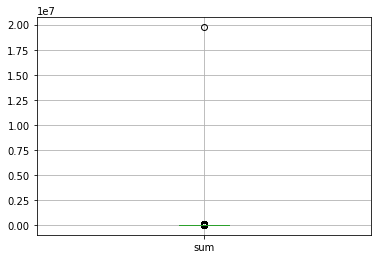

In [4]:
pd.DataFrame(month_sum['sum']).boxplot()
# the highest value  (id_card = 883386) is obviously an outlier

In [5]:
q = month_sum['sum'].quantile([0.9, 0.95, 0.99, 0.999, 0.99999])
month_thr = q[0.99999]
print(q)

0.90000    10123.370000
0.95000    14928.350000
0.99000    27327.810000
0.99900    45934.502800
0.99999    89790.455416
Name: sum, dtype: float64


In [6]:
filtered_by_month = month_sum[month_sum['sum'] > month_thr]
filtered_by_month

,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
438656,588107,341304414,5624473,4615206,857.000,89808.07,0,3565371434
266829,352617,4392588389,12402500,-2932409,843.013,90090.16,0,6034261300
91019,119608,2605944255,8465059,3961973,808.001,90132.81,0,5761440842
532291,718802,4489313328,14754628,1186462,822.620,90538.90,0,6570639896
1189846,1657891,0,9327863,7239270,704.756,94668.41,6,6266508189
1343965,1906623,2835398381,6135756,4867299,753.621,94737.13,0,3581795611
120796,158714,3118721055,11279417,5065061,1041.223,96172.50,0,4294972614
826548,1132326,3359852088,9395056,3065396,881.070,96560.94,5,6030881399
292559,387638,221646984,9429064,5583899,911.422,96859.11,54,5261865074
359612,478842,3123997884,8437591,2477303,753.665,102894.66,0,4385136242


## Too high doc `sum`

In [7]:
doc_sum = df.groupby(by=['id_card_int', 'id_doc_int'], as_index=False).sum().sort_values(by='sum')
doc_sum

,id_card_int,id_doc_int,id_order,id_tov,id_kontr,quantity,sum,is_green
6430113,1444634,3222989,0,21392,-9999,1.000,0.00,0
5845847,1300291,10679165,0,25008,-9999,1.000,0.00,0
5845853,1300291,20972940,0,25008,17533,1.000,0.00,0
5845854,1300291,21340507,0,25008,-9999,1.000,0.00,0
713264,137816,16159563,0,21392,-9999,1.000,0.00,0
...,...,...,...,...,...,...,...,...
4323786,931261,14988854,765354048,2212346,1460434,150.306,22392.60,0
3013831,639106,8056926,540001224,1304468,979166,129.502,22403.99,0
796131,154168,8813447,790315738,2309132,-887620,189.600,24489.20,0
2175,200,7450301,285261785,1000113,-347682,249.870,24852.34,0


<AxesSubplot:>

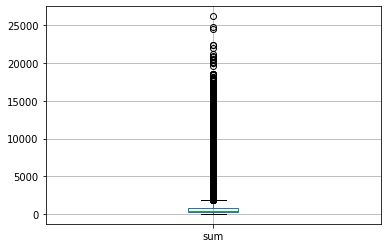

In [9]:
pd.DataFrame(doc_sum['sum']).boxplot()

In [10]:
d_q = doc_sum['sum'].quantile([0.9, 0.95, 0.99, 0.999, 0.99999])
doc_thr = d_q[0.99999]
print(d_q)

0.90000     1474.000000
0.95000     2007.940000
0.99000     3450.422600
0.99900     6189.280560
0.99999    15269.434194
Name: sum, dtype: float64


In [11]:
filtered_by_doc = doc_sum[doc_sum['sum'] > doc_thr]
filtered_by_doc

,id_card_int,id_doc_int,id_order,id_tov,id_kontr,quantity,sum,is_green
7932752,1911551,14733345,340429166,841507,722426,102.520,15330.43,0
6644855,1499243,3902372,446064960,1130759,-315620,174.050,15333.63,0
444872,84246,4953583,0,1918414,1046798,128.974,15339.74,0
4472599,968818,363079,812026446,2074274,1337639,172.241,15360.00,0
6801277,1539676,9076514,0,1033125,719694,144.118,15407.02,0
...,...,...,...,...,...,...,...,...
4323786,931261,14988854,765354048,2212346,1460434,150.306,22392.60,0
3013831,639106,8056926,540001224,1304468,979166,129.502,22403.99,0
796131,154168,8813447,790315738,2309132,-887620,189.600,24489.20,0
2175,200,7450301,285261785,1000113,-347682,249.870,24852.34,0


## Too often shops (value of `id_doc`) per month

In [12]:
doc_num = df.groupby('id_doc_int', as_index=False).first().groupby(by=['id_card_int'], as_index=False).count()
doc_num

,id_card_int,id_doc_int,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green
0,1,1,1,1,1,1,1,1,1,1,1
1,3,3,3,3,3,3,3,3,3,3,3
2,4,4,4,4,4,4,4,4,4,4,4
3,5,6,6,6,6,6,6,6,6,6,6
4,8,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1363956,1940156,1,1,1,1,1,1,1,1,1,1
1363957,1940883,1,1,1,1,1,1,1,1,1,1
1363958,1941912,54,54,54,54,54,54,54,54,54,54
1363959,1943358,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

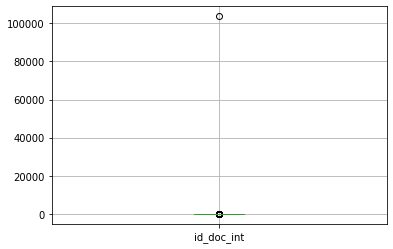

In [13]:
pd.DataFrame(doc_num['id_doc_int']).boxplot()

In [15]:
n_q = doc_num['id_doc_int'].quantile([0.9, 0.95, 0.99, 0.999, 0.99999])
doc_num_thr = n_q[0.99999]
print(n_q)

0.90000     14.0000
0.95000     20.0000
0.99000     35.0000
0.99900     61.0000
0.99999    127.7208
Name: id_doc_int, dtype: float64


In [17]:
filtered_by_doc_num = doc_num[doc_num['id_doc_int'] > doc_num_thr]
filtered_by_doc_num

,id_card_int,id_doc_int,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green
104855,137816,153,153,153,153,153,153,153,153,153,153
240887,317600,147,147,147,147,147,147,147,147,147,147
308593,409439,129,129,129,129,129,129,129,129,129,129
317603,421742,141,141,141,141,141,141,141,141,141,141
334123,444111,135,135,135,135,135,135,135,135,135,135
397444,531034,168,168,168,168,168,168,168,168,168,168
405906,542660,181,181,181,181,181,181,181,181,181,181
649740,883386,103607,103607,103607,103607,103607,103607,103607,103607,103607,103607
671920,914348,153,153,153,153,153,153,153,153,153,153
692755,943480,178,178,178,178,178,178,178,178,178,178


In [3]:
def pipeline(path):
    with bz2.open(path, 'rb') as f:
        df = pickle.load(f)
    month_sum = df.groupby(by='id_card_int', as_index=False).sum().sort_values(by='sum')
    month_thr = month_sum['sum'].quantile([0.999995])[0.999995]
    filtered_by_month = set(month_sum[month_sum['sum'] > month_thr]['id_card_int'].values)
    del month_sum
    
    doc_sum = df.groupby(by=['id_card_int', 'id_doc_int'], as_index=False).sum().sort_values(by='sum')
    doc_thr = doc_sum['sum'].quantile([0.999995])[0.999995]
    filtered_by_doc = set(doc_sum[doc_sum['sum'] > doc_thr]['id_card_int'].values)
    del doc_sum
    
    doc_num = df.groupby('id_doc_int', as_index=False).first().groupby(by=['id_card_int'], as_index=False).count()
    doc_num_thr = doc_num['id_doc_int'].quantile([0.999995])[0.999995]
    filtered_by_doc_num = set(doc_num[doc_num['id_doc_int'] > doc_num_thr]['id_card_int'].values)
    del doc_num
    
    del df
    
    return filtered_by_month.union(filtered_by_doc).union(filtered_by_doc_num)
set1 = pipeline('10_prepared.pkl.bz2')
set1

{200,
 14078,
 83597,
 85774,
 102178,
 125230,
 129347,
 137816,
 143568,
 154168,
 197882,
 225201,
 259344,
 274667,
 286147,
 297366,
 318708,
 320393,
 339042,
 387638,
 421742,
 442230,
 478842,
 531034,
 542660,
 544290,
 568930,
 588107,
 639106,
 675503,
 883386,
 914348,
 931261,
 943480,
 1028081,
 1079441,
 1115669,
 1132326,
 1134727,
 1161763,
 1230177,
 1387578,
 1441152,
 1474183,
 1698198,
 1701715,
 1894785,
 1913914,
 1914994,
 1915299}

In [4]:
set2 = pipeline('11_prepared.pkl.bz2')
set2

{280,
 301,
 225201,
 262976,
 274667,
 280312,
 304502,
 356029,
 373013,
 384923,
 442230,
 497966,
 531034,
 588107,
 620767,
 642430,
 702305,
 800805,
 883386,
 963262,
 975892,
 1012899,
 1028081,
 1045858,
 1263823,
 1312070,
 1359470,
 1462455,
 1577248,
 1841799,
 1914994,
 1915516,
 1929072}

In [5]:
set3 = pipeline('09_prepared.pkl.bz2')
set3

{48,
 129282,
 132928,
 161838,
 225201,
 274667,
 317600,
 348919,
 368551,
 388932,
 488719,
 497966,
 508835,
 568930,
 588107,
 620767,
 636272,
 648111,
 686321,
 784343,
 816031,
 883386,
 914348,
 935791,
 948175,
 1121726,
 1157493,
 1243870,
 1260932,
 1268851,
 1387578,
 1407478,
 1429536,
 1447941,
 1499243,
 1552728,
 1750466,
 1755035,
 1911522,
 1929067}

In [6]:
print(set1.union(set2).union(set3))
# result

{129282, 1447941, 85774, 488719, 259344, 975892, 1115669, 373013, 280, 1577248, 1429536, 102178, 544290, 1161763, 800805, 1132326, 301, 125230, 497966, 161838, 48, 387638, 154168, 1913914, 1387578, 262976, 132928, 129347, 388932, 1312070, 588107, 1701715, 137816, 1552728, 531034, 1230177, 568930, 339042, 702305, 1045858, 1499243, 1929067, 421742, 1359470, 1929072, 935791, 1914994, 636272, 1268851, 1157493, 442230, 304502, 943480, 478842, 1915516, 642430, 1441152, 1894785, 639106, 1260932, 1474183, 1134727, 320393, 1841799, 83597, 1079441, 1698198, 297366, 384923, 1755035, 816031, 317600, 1915299, 1012899, 508835, 368551, 914348, 675503, 648111, 225201, 1462455, 883386, 931261, 356029, 963262, 1121726, 1750466, 286147, 542660, 200, 1263823, 143568, 948175, 784343, 1243870, 620767, 1911522, 274667, 1028081, 686321, 318708, 1407478, 348919, 280312, 197882, 14078}


## About negative values

In [14]:
sl_ql = df[(df['sum'] < 0) & (df['quantity'] < 0)]
sl_qh = df[(df['sum'] < 0) & (df['quantity'] > 0)]
sh_ql = df[(df['sum'] > 0) & (df['quantity'] < 0)]

In [15]:
sl_ql

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int


In [16]:
sl_qh

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206092,2020-09-04 09:10:21,827B9591-75EE-EA11-B444-005056A7539A,0,7009929,23074,19269,1.268,-470.43,False,1301664,11939194
4206102,2020-09-04 09:09:24,F6807973-75EE-EA11-B444-005056A7539A,0,7707981,23074,19269,1.268,-470.43,False,1419650,22549976
4210124,2020-09-04 08:37:00,49C21AF5-70EE-EA11-B444-005056A7539A,0,5554550,23074,19269,1.084,-402.16,False,1035577,6745380
4218019,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,0.001,-0.37,False,126995,16694740
4218021,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,2.375,-881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...,...,...
5396780,2020-09-04 08:37:49,1CC214FB-70EE-EA11-B444-005056A7539A,0,4916790,23074,19269,1.236,-458.56,False,906517,2630312
5438901,2020-09-04 09:28:21,E6F17E03-78EE-EA11-B444-005056A7539A,0,5931979,23074,19269,0.572,-212.21,False,1102820,21125316
5450157,2020-09-04 09:21:17,CD1BCB2C-77EE-EA11-B444-005056A7539A,0,3290674,23074,19269,0.915,-339.47,False,574393,18763274
5450159,2020-09-04 09:21:17,CD1BCB2C-77EE-EA11-B444-005056A7539A,0,3290674,23074,19269,0.915,-339.47,False,574393,18763274


In [17]:
sh_ql

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206093,2020-09-04 09:10:21,827B9591-75EE-EA11-B444-005056A7539A,0,7009929,23074,19269,-1.268,470.43,False,1301664,11939194
4206103,2020-09-04 09:09:24,F6807973-75EE-EA11-B444-005056A7539A,0,7707981,23074,19269,-1.268,470.43,False,1419650,22549976
4210123,2020-09-04 08:37:00,49C21AF5-70EE-EA11-B444-005056A7539A,0,5554550,23074,19269,-1.084,402.16,False,1035577,6745380
4218020,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-0.001,0.37,False,126995,16694740
4218022,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-2.375,881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...,...,...
5382631,2020-09-04 09:13:44,8B5F8150-76EE-EA11-B444-005056A7539A,0,8593402,23074,19269,-0.692,256.73,False,1538576,12752264
5396781,2020-09-04 08:37:49,1CC214FB-70EE-EA11-B444-005056A7539A,0,4916790,23074,19269,-1.236,458.56,False,906517,2630312
5438902,2020-09-04 09:28:21,E6F17E03-78EE-EA11-B444-005056A7539A,0,5931979,23074,19269,-0.572,212.21,False,1102820,21125316
5450158,2020-09-04 09:21:17,CD1BCB2C-77EE-EA11-B444-005056A7539A,0,3290674,23074,19269,-0.915,339.47,False,574393,18763274


In [18]:
# as I think that pair of negative positive values that always have a pair,  are the cancellation of purchase
# another month even hadn't such a strange negative values
# I don't think that customers should be considere as outliers